In [1]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)

In [2]:
Nx = 64
Ny = 1
Nz = 64
et = 1.0
N = 1
base_fn = 'output_travelling_vortex'
pydir = '../%s/' %base_fn

tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
tags = tc.get_tag_dict()

after_full_step
(68, 5, 68)
(68, 5, 68)
(68, 5, 68)
(68, 5, 68)
(68, 5, 68)
(69, 6, 69)


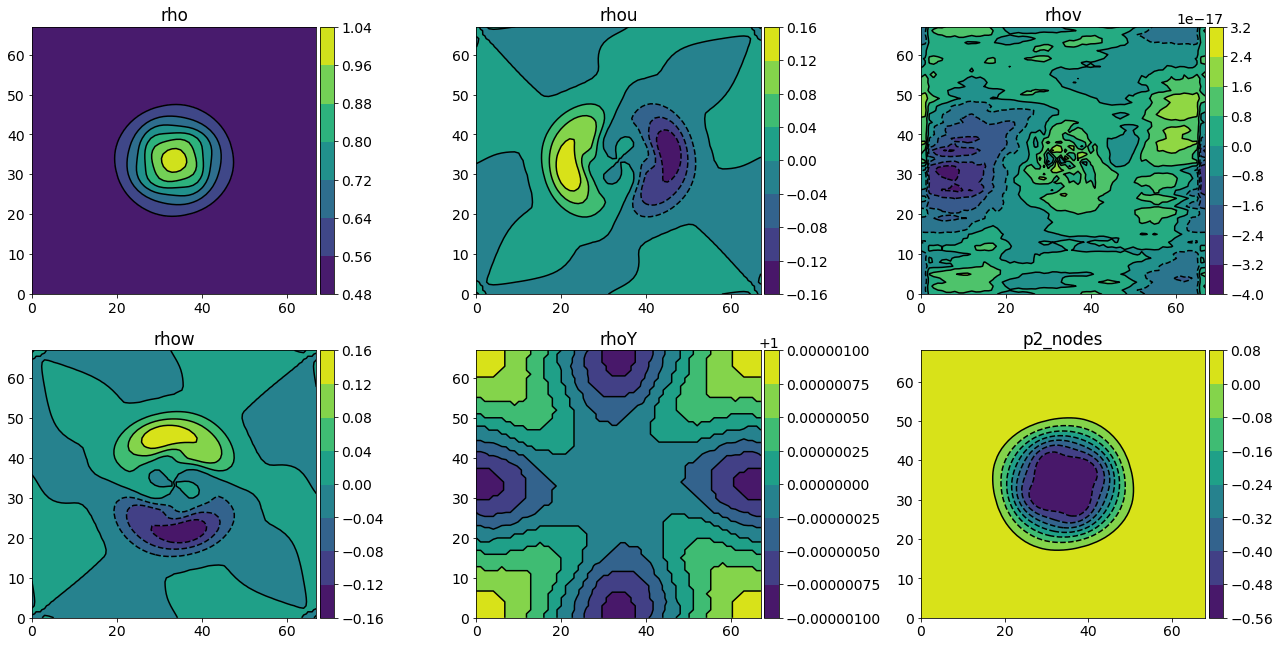

In [488]:
comp_sfx = '3D'
fn = tc.get_filename(N,comp_sfx)
path = tc.get_path(fn)
tag = tags[9]
print(tag)
# tag = 'ic'

attributes = ['rho','rhou','rhov','rhow','rhoY','p2_nodes']
tags_flux = ['half_split_2','half_split_1','half_split_0']
# attributes = ['rhoYu', 'rhoYv', 'rhoYw']
# attributes = ['Leftsu', 'Rightsu', 'Leftsv', 'Rightsv', 'Leftsw', 'Rightsw', 'LeftsrhoY', 'RightsrhoY']

# attributes = ['rho','rhoY','Y']
# attributes = ['rho']
# ii = 2
# tag = tags_flux[ii]
times = [39] #, 150, 180, 260, 280]
# times = [165]
# times = [10]

H = 10.0
slc = 0
sslc = [slice(None,)]*3
sslc[1] = 2
sslc = tuple(sslc)
arr_lst = []

i1 = [slice(1,-1)]*3
i1 = tuple(i1)

for time in times:
    for attribute in attributes:
        arr = tc.get_arr(path, time, N, attribute, label_type='WINDOW_STEP', tag=tag, inner=False, avg=False)[0]#[:,slc,:]
        print(arr.shape)
        arr = arr[sslc]
        if attribute == 'rho':
#             arr -= H
            rho = np.copy(arr)

        if attribute == 'rhoY':
            rhoY = np.copy(arr)
        arr_lst.append([arr,attribute])

#     Y = rhoY / (rho+1.0)
#     arr_lst.append([rho - H, 'rho, time-step=%i' %time])
pl = pt.plotter(arr_lst,ncols=3,figsize=(18,10))
_ = pl.plot(aspect='auto',method='contour')


../output_travelling_vortex/output_travelling_vortex_ensemble=1_64_1_64_1.0_3D.h5
../output_travelling_vortex/output_travelling_vortex_ensemble=1_64_3_64_1.0_3D.h5
(69, 6, 69) (69, 8, 69)
(69, 6, 69) (69, 8, 69)
(69, 6, 69) (69, 8, 69)
(69, 6, 69) (69, 8, 69)
(69, 6, 69) (69, 8, 69)
(69, 6, 69) (69, 8, 69)
(69, 6, 69) (69, 8, 69)
(69, 6, 69) (69, 8, 69)


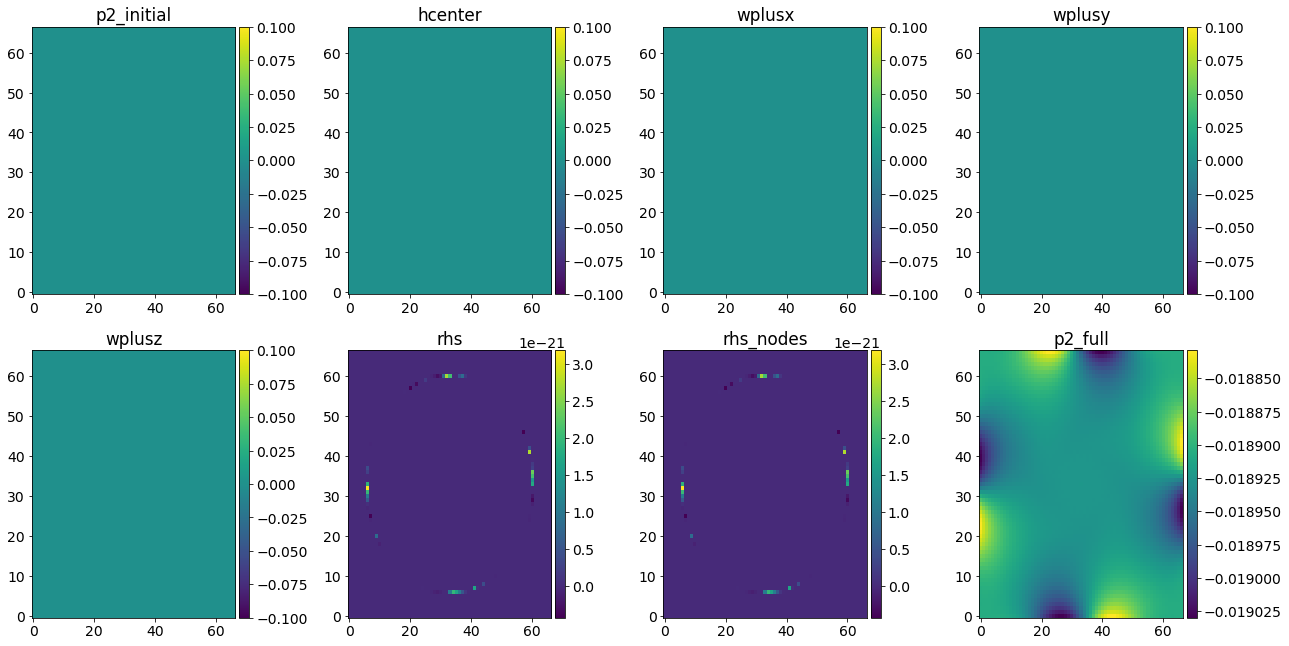

In [469]:
Nx = 64
Ny = 3
Nz = 64
et = 1.0
N = 1
base_fn = 'output_travelling_vortex'
pydir = '../%s/' %base_fn

tc1 = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
tags = tc1.get_tag_dict()

comp_sfx = '3D'
fn1 = tc1.get_filename(N,comp_sfx)
path1 = tc1.get_path(fn1)

Ny = 1

tc0 = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
tags = tc0.get_tag_dict()

comp_sfx = '3D'
fn0 = tc0.get_filename(N,comp_sfx)
path0 = tc0.get_path(fn0)

print(path0)
print(path1)

tag = tags[4]
# tag = 'ic'

attributes = ['rho','rhou','rhov','rhow','rhoY','rhoY']
tags_flux = ['half_split_2','half_split_1','half_split_0']
attributes = ['p2_initial', 'hcenter', 'wplusx', 'wplusy', 'wplusz', 'rhs', 'rhs_nodes', 'p2_full']
# attributes = ['rhoYu', 'rhoYv', 'rhoYw']
# attributes = ['Leftsu', 'Rightsu', 'Leftsv', 'Rightsv', 'Leftsw', 'Rightsw', 'LeftsrhoY', 'RightsrhoY']

# attributes = ['rho','rhoY','Y']
# attributes = ['rho']
# ii = 0
# tag = tags_flux[ii]
times = [0] #, 150, 180, 260, 280]
# times = [165]
# times = [10]

H = 10.0
sslc = [slice(None,)]*3
slc = {0:1,1:2,2:0}
sslc[slc[ii]] = 2
sslc = tuple(sslc)

arr_lst = []

i1 = [slice(1,-1)]*2
# i1 = [slice(None,)]*2
i1 = tuple(i1)

inner = False

for nn,time in enumerate(times):

    for nn,attribute in enumerate(attributes):
#         sslc = [slice(None,)]*3
#         slc = {0:0,1:2,2:1}
#         sslc[slc[nn]] = 1
#         sslc = tuple(sslc)
#         print(sslc)
        
        arr0 = tc.get_arr(path0, time, N, attribute, label_type='WINDOW_STEP', tag=tag, inner=inner, avg=False)[0]#[:,slc,:]
        arr1 = tc.get_arr(path1, time, N, attribute, label_type='WINDOW_STEP', tag=tag, inner=inner, avg=False)[0]#[:,slc,:]
        
        print(arr0.shape, arr1.shape)
#         arr = arr[sslc]
        arr = (arr1[sslc][i1]-arr0[sslc][i1])
        if attribute == 'rho':
#             arr -= H
            rho = np.copy(arr)

        if attribute == 'rhoY':
            rhoY = np.copy(arr)
        arr_lst.append([arr,attribute])

#     Y = rhoY / (rho+1.0)
#     arr_lst.append([rho - H, 'rho, time-step=%i' %time])
pl = pt.plotter(arr_lst,ncols=4,figsize=(18,10))
_ = pl.plot(aspect='auto',method='imshow')

In [401]:
kernel_u = 2.0*np.array([[0.5,1.,0.5],[0.5,1.,0.5]])
kernel_v = kernel_u.T
print(kernel_u.shape)
print(kernel_v.shape)

print(kernel_u / kernel_u.sum())

(2, 3)
(3, 2)
[[0.125 0.25  0.125]
 [0.125 0.25  0.125]]
